In [7]:
import pandas as pd
from pplots import read_embeddings, plot_embedding, plot_embedding_interactive, rotate, get_colors

%matplotlib inline

# for debugging: 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from adjustText import adjust_text
from model import poincare_translation

import matplotlib
#matplotlib.use('Agg')

#from chart_studio import plotly as py
import plotly.graph_objs as go
#import plotly.io as pio
import plotly
import plotly.express as px

#import cufflinks as cf

In [2]:
#cf.go_offline()

# Loading data

Define full path to the folders containing annotation (data labels) and embedding:

In [27]:
path_annotation = '/home/lavande/galochkina/SCIENCE/POINCARE/PoincareMSA/examples/thioredoxins/annotation.csv'
path_embedding = '/home/lavande/galochkina/SCIENCE/POINCARE/Thioredoxin/TEST1/PM4sigma=1.00gamma=2.00cosinepca=0_seed0.csv'

Read embedding together with annotations to the variable. If annotation is not provided, simple plots without colors or legends will be produced.

In [28]:
df = read_embeddings(path_embedding, path_annotation, withroot=True) 
# withroot must be set to 'False' if the center of Poincaré disk is not known

result:                    pm1       pm2      Species   Kingdom          Family
proteins_id                                                           
0            0.000000  0.000000         root      root            root
1            0.162682  0.100363         LBCA      LBCA            LBCA
2           -0.011244  0.235535         LACA      LACA            LACA
3           -0.024184  0.140067         AECA      AECA            AECA
4            0.408400 -0.421270        LGPCA     LGPCA           LGPCA
...               ...       ...          ...       ...             ...
206         -0.690877  0.484400  Escherichia  Bacteria  Proteobacteria
207         -0.259855 -0.760191     Shigella  Bacteria  Proteobacteria
208         -0.270246 -0.756799   Salmonella  Bacteria  Proteobacteria
209         -0.272372 -0.776062     Yersinia  Bacteria  Proteobacteria
210         -0.701583  0.490606       Vibrio  Bacteria  Proteobacteria

[211 rows x 5 columns]


Specify full name of the output figure.

In [5]:
output_file = '/home/lavande/galochkina/SCIENCE/POINCARE/Thioredoxin/TEST/test_projections_noroot.png'

# Plot projections. 
We propose two types of projection plotting. Either producing static images saves as .png or interactive plotting with possibility to zoom, select and scroll legend.

## Static images
Simple plotting without legend or labels. If you set labels_name=None, it will be a plain embedding without labels. labels_text currently doesn't work.

In [137]:
print(df.head(5))

                  pm1       pm2 Species Kingdom Family
proteins_id                                           
0            0.000000  0.000000    root    root   root
1           -0.069907 -0.009436    LBCA    LBCA   LBCA
2           -0.019883 -0.090531    LACA    LACA   LACA
3           -0.057395 -0.082736    AECA    AECA   AECA
4           -0.252554  0.116813   LGPCA   LGPCA  LGPCA


Number of unique labels:  136
Saved file to: /home/lavande/galochkina/SCIENCE/POINCARE/Thioredoxin/TEST/test_projections_noroot.png


<module 'matplotlib.pyplot' from '/home/lavande/galochkina/miniconda3/envs/poincare/lib/python3.7/site-packages/matplotlib/pyplot.py'>

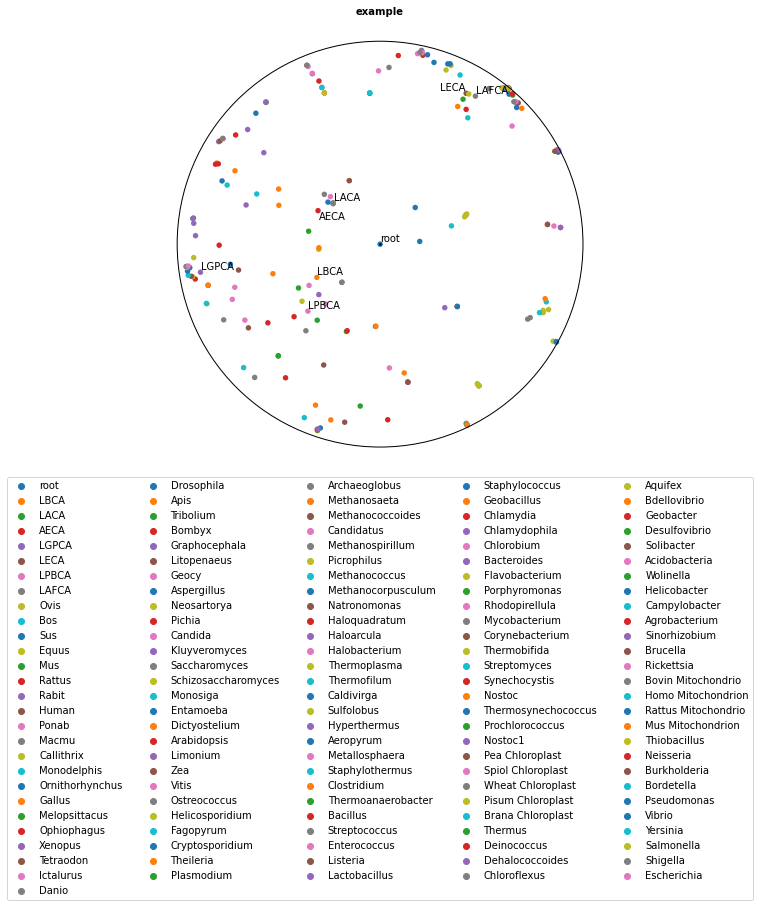

In [131]:
plot_embedding(
    df,
    labels_name='Species',
    labels_text= ['root', 'LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA', ],
    show_text=True,
    title='example',
    file_name=output_file,
    plot_legend=True,
    fig_width = 8,
    fig_height = 8,
    fontsize = 10
    )

Number of unique labels:  11
Saved file to: /home/lavande/galochkina/SCIENCE/POINCARE/Thioredoxin/TEST/test_projections_noroot.png


<module 'matplotlib.pyplot' from '/home/lavande/galochkina/miniconda3/envs/poincare/lib/python3.7/site-packages/matplotlib/pyplot.py'>

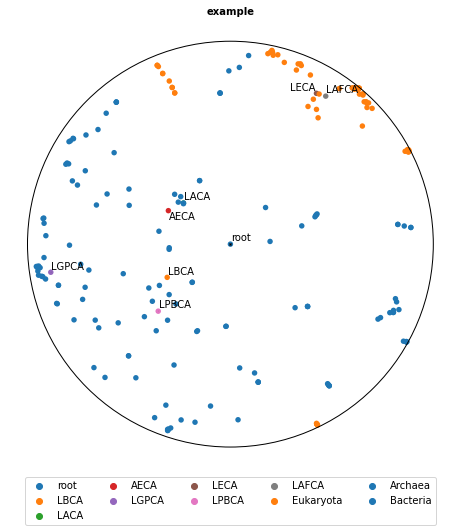

In [11]:
plot_embedding(
    df,
    labels_name='Kingdom',
    labels_text= ['root', 'LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA', ],
    show_text=True,
    title='example',
    file_name=output_file,
    plot_legend=True,
    fig_width = 8,
    fig_height = 8,
    fontsize = 10
    )

## Interactive plotting

In [125]:
def plot_embedding_interactive(
        df,
        labels=None,
        labels_text=None,
        labels_idx=None,
#        col_dict=None,
        title=None,
        show_lines=False,
        show_text=False,
        show_legend=True,
        circle_size=30,
        circe_transparency=1.0,
        line_transparency=0.8,
        line_width=0.8,
        fontsize=9,
#        fig_width=5,
#        fig_height=5,
        file_name=None,
        file_format=None,
        labels_name=None,
#        width_ratios=[7, 1],
#        bbox=(1.3, 0.7),
        plot_legend=False,
    ):
    if not (labels_name is None):
        labels = df[labels_name].values
    else:
        labels_name = 'labels'
        df[labels_name] = 'na'

    if labels_text == 'all':
        labels_text = labels

    #if (col_dict is None) and not (labels is None):
    #    col_dict = get_colors(labels)

  #  plt1 = px.density_contour(df, x = 'pm1', y = 'pm2', color = labels_name)
  #  plt1.update_traces(contours_coloring="fill")
  #  plt1.show()
        
    plt = px.scatter(df, x = 'pm1', y = 'pm2', 
                     color = labels_name, 
                     #labels={'color': labels}, 
                     hover_name=labels_name, 
                     hover_data=df.columns[2:], 
                     height = 800)
    print(df.columns[2:])
    
    if show_text and (not (labels_text is None)):
        texts = df.loc[df[labels_name].isin(labels_text)]
        labels_idx = texts.index

        for i in labels_idx:
            plt.add_annotation(x=texts.loc[i,'pm1'], y=texts.loc[i,'pm2'],
                       text=texts.loc[i, labels_name],
                       showarrow=True,
                       arrowhead=1)
        plt.update_traces(textposition='top right')

    plt.add_shape(type="circle",
                  xref="x", yref="y",
                  x0=-1, y0=-1, x1=1, y1=1,
                  line_color="Black")
    
    plt.update_xaxes(range = [-1.1, 1.1], constrain="domain")
    plt.update_yaxes(scaleanchor = "x", scaleratio = 1)
    
#    plt.add_trace(px.density_contour(df, x = 'pm1', y = 'pm2', color = labels_name))
#    print(df.loc[df["Kingdom"]=="Bacteria", "pm1"])
#    plt.add_trace(go.Histogram2dContour(x = df.loc[df["Kingdom"]=="Bacteria", "pm1"] , y = df.loc[df["Kingdom"]=="Bacteria", "pm2"])) #, color = labels_name))

    #    plt.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    plt.update_layout(yaxis2=dict(matches='y', layer="below traces", overlaying="y", ),)
    plt.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})


    
    if file_name:
        save_to_file(fig, file_name, file_format)

    return plt

Try to add two labels at the same time:

In [138]:
def plot_embedding_interactive(
        df,
        labels=None,
        labels_text=None,
        secondary_labels=None,
        labels_idx=None,
#        col_dict=None,
        title=None,
        show_lines=False,
        show_text=False,
        show_legend=True,
        circle_size=30,
        circe_transparency=1.0,
        line_transparency=0.8,
        line_width=0.8,
        fontsize=9,
#        fig_width=5,
#        fig_height=5,
        file_name=None,
        file_format=None,
        labels_name=None,
#        width_ratios=[7, 1],
#        bbox=(1.3, 0.7),
        plot_legend=False,
    ):
    if not (labels_name is None):
        labels = df[labels_name].values
    else:
        labels_name = 'labels'
        df[labels_name] = 'na'

    if labels_text == 'all':
        labels_text = labels

    #if (col_dict is None) and not (labels is None):
    #    col_dict = get_colors(labels)

  #  plt1 = px.density_contour(df, x = 'pm1', y = 'pm2', color = labels_name)
  #  plt1.update_traces(contours_coloring="fill")
  #  plt1.show()
        
    plt1 = go.Scatter(x = df['pm1'], y = df['pm2'],
                      mode = 'markers',
                    #  color = labels_name, 
                    #labels={'color': labels}, 
                      hoverlabel=df[labels_name].values, 
                      hovertext=df.columns[2:], 
                      height = 800)
    print(df.columns[2:])

    
    if secondary_labels != None:
            plt2 = go.Scatter(x = df['pm1'], y = df['pm2'], 
                             mode='markers', 
                             marker_size = 20, 
                             opacity = 0.5, 
                             hoverinfo='skip', 
                            # marker_color = df["Kingdom"].values
                            )
    if secondary_labels == None:
        plt = go.Figure(plt1)

    
    
    if show_text and (not (labels_text is None)):
        texts = df.loc[df[labels_name].isin(labels_text)]
        labels_idx = texts.index

        for i in labels_idx:
            plt.add_annotation(x=texts.loc[i,'pm1'], y=texts.loc[i,'pm2'],
                       text=texts.loc[i, labels_name],
                       showarrow=True,
                       arrowhead=1)
        plt.update_traces(textposition='top right')

    plt.add_shape(type="circle",
                  xref="x", yref="y",
                  x0=-1, y0=-1, x1=1, y1=1,
                  line_color="Black")
    
    plt.update_xaxes(range = [-1.1, 1.1], constrain="domain")
    plt.update_yaxes(scaleanchor = "x", scaleratio = 1)
    
#    plt.add_trace(px.density_contour(df, x = 'pm1', y = 'pm2', color = labels_name))
#    print(df.loc[df["Kingdom"]=="Bacteria", "pm1"])
#    plt.add_trace(go.Histogram2dContour(x = df.loc[df["Kingdom"]=="Bacteria", "pm1"] , y = df.loc[df["Kingdom"]=="Bacteria", "pm2"])) #, color = labels_name))
    
    

    #    plt.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
#    plt.update_layout(yaxis2=dict(matches='y', layer="below traces", overlaying="y", ),)
    plt.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})


    
    if file_name:
        save_to_file(fig, file_name, file_format)

    return plt

Create plot:

In [29]:
trace1 = plot_embedding_interactive(df, labels_name='Family', 
                               show_text=True,
                              labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA', 'Macmu', 'Aeropyrum']
                              )
trace1.show()

Index(['Species', 'Kingdom', 'Family'], dtype='object')


# Rotate the embedding with respect to the root.

In [7]:
df_rot = rotate(df)